# Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import math
%matplotlib inline

import missingno

sns.set(style="whitegrid")

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [3]:
raw_data = pd.read_excel('E:\\Datasets\\icc-test-cricket-runs\\ICC Test Bat 3001.xlsx',sheet_name='book') 

In [4]:
# print the shape
print('The shape of the dataset : ', raw_data.shape)

The shape of the dataset :  (3001, 12)


In [5]:
# preview dataset
raw_data.head(10)

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...
5,KC Sangakkara (SL),2000-2015,134,233,17,12400,319,57.4,38,52,11,http://stats.espncricinfo.com/ci/content/playe...
6,BC Lara (ICC/WI),1990-2006,131,232,6,11953,400*,52.88,34,48,17,http://stats.espncricinfo.com/ci/content/playe...
7,S Chanderpaul (WI),1994-2015,164,280,49,11867,203*,51.37,30,66,15,http://stats.espncricinfo.com/ci/content/playe...
8,DPMD Jayawardene (SL),1997-2014,149,252,15,11814,374,49.84,34,50,15,http://stats.espncricinfo.com/ci/content/playe...
9,AR Border (AUS),1978-1994,156,265,44,11174,205,50.56,27,63,11,http://stats.espncricinfo.com/ci/content/playe...


In [6]:
# preview dataset
raw_data.tail(20)

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
2981,Ali Hussain Rizvi (PAK),1997-1997,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2982,PJ Allan (AUS),1965-1965,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2983,JC Clay (ENG),1935-1935,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2984,DJ Cullen (AUS),2006-2006,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2985,HT Dani (INDIA),1952-1952,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2986,Farrukh Zaman (PAK),1976-1976,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2987,AB Howard (WI),1972-1972,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2988,A Khan (ENG),2009-2009,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2989,JCW MacBryan (ENG),1924-1924,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2990,LR Pierre (WI),1948-1948,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...


In [7]:
raw_data.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...


### These 20 players have no appearance in International Test cricket matches so removing them will be sensible for this EDA analysis

In [8]:
df  = raw_data[0:2981]

In [9]:
df.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...


In [10]:
df.tail()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
2976,M Venkataramana (INDIA),1989-1989,1,2,2,0,0*,-,0,0,0,http://stats.espncricinfo.com/ci/content/playe...
2977,DW White (ENG),1961-1962,2,2,0,0,0,0,0,0,2,http://stats.espncricinfo.com/ci/content/playe...
2978,P Wilson (AUS),1998-1998,1,2,2,0,0*,-,0,0,0,http://stats.espncricinfo.com/ci/content/playe...
2979,CS Wimble (SA),1892-1892,1,2,0,0,0,0,0,0,2,http://stats.espncricinfo.com/ci/content/playe...
2980,Zahir Khan (AFG),2019-2019,2,4,3,0,0*,0,0,0,1,http://stats.espncricinfo.com/ci/content/playe...


In [11]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 12 columns):
Player            2981 non-null object
Span              2981 non-null object
Mat               2981 non-null int64
Inn               2981 non-null object
NO                2981 non-null object
Runs              2981 non-null object
HS                2981 non-null object
Avg               2981 non-null object
100               2981 non-null object
50                2981 non-null object
0                 2981 non-null object
Player Profile    2981 non-null object
dtypes: int64(1), object(11)
memory usage: 279.5+ KB


In [12]:
df.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...


In [13]:
hs = df.HS

In [14]:
hs = list(hs)
type(hs)


list

In [15]:
for i in range(0,len(hs)):
    temp = str(hs[i]).replace('*','')
    temp = int(temp)
    hs[i] = temp

In [16]:
print(hs)

[248, 257, 224, 270, 294, 319, 400, 203, 374, 205, 200, 236, 313, 311, 277, 333, 280, 329, 281, 278, 329, 380, 319, 291, 190, 215, 227, 246, 365, 153, 185, 235, 250, 182, 226, 223, 334, 242, 184, 200, 254, 275, 336, 333, 239, 254, 274, 239, 290, 247, 335, 177, 334, 340, 364, 166, 256, 200, 302, 242, 267, 195, 256, 199, 228, 205, 222, 194, 302, 291, 219, 278, 237, 207, 233, 206, 197, 160, 204, 125, 249, 193, 231, 299, 211, 250, 196, 185, 219, 163, 210, 161, 208, 310, 135, 274, 258, 224, 311, 232, 171, 222, 142, 194, 275, 204, 285, 140, 137, 205, 207, 196, 213, 207, 165, 187, 135, 138, 161, 169, 206, 173, 206, 175, 219, 157, 206, 231, 188, 131, 188, 167, 167, 167, 260, 337, 217, 261, 164, 167, 226, 206, 136, 137, 220, 258, 111, 176, 135, 199, 162, 224, 201, 132, 216, 223, 205, 262, 148, 175, 264, 206, 205, 218, 212, 189, 201, 176, 142, 191, 178, 172, 139, 158, 211, 154, 216, 169, 226, 260, 189, 201, 143, 214, 169, 99, 151, 142, 170, 209, 100, 198, 177, 113, 208, 172, 259, 236, 231, 147, 

In [17]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 12 columns):
Player            2981 non-null object
Span              2981 non-null object
Mat               2981 non-null int64
Inn               2981 non-null object
NO                2981 non-null object
Runs              2981 non-null object
HS                2981 non-null object
Avg               2981 non-null object
100               2981 non-null object
50                2981 non-null object
0                 2981 non-null object
Player Profile    2981 non-null object
dtypes: int64(1), object(11)
memory usage: 279.5+ KB


In [18]:
df = df.convert_objects(convert_numeric=True)

# Missing Value

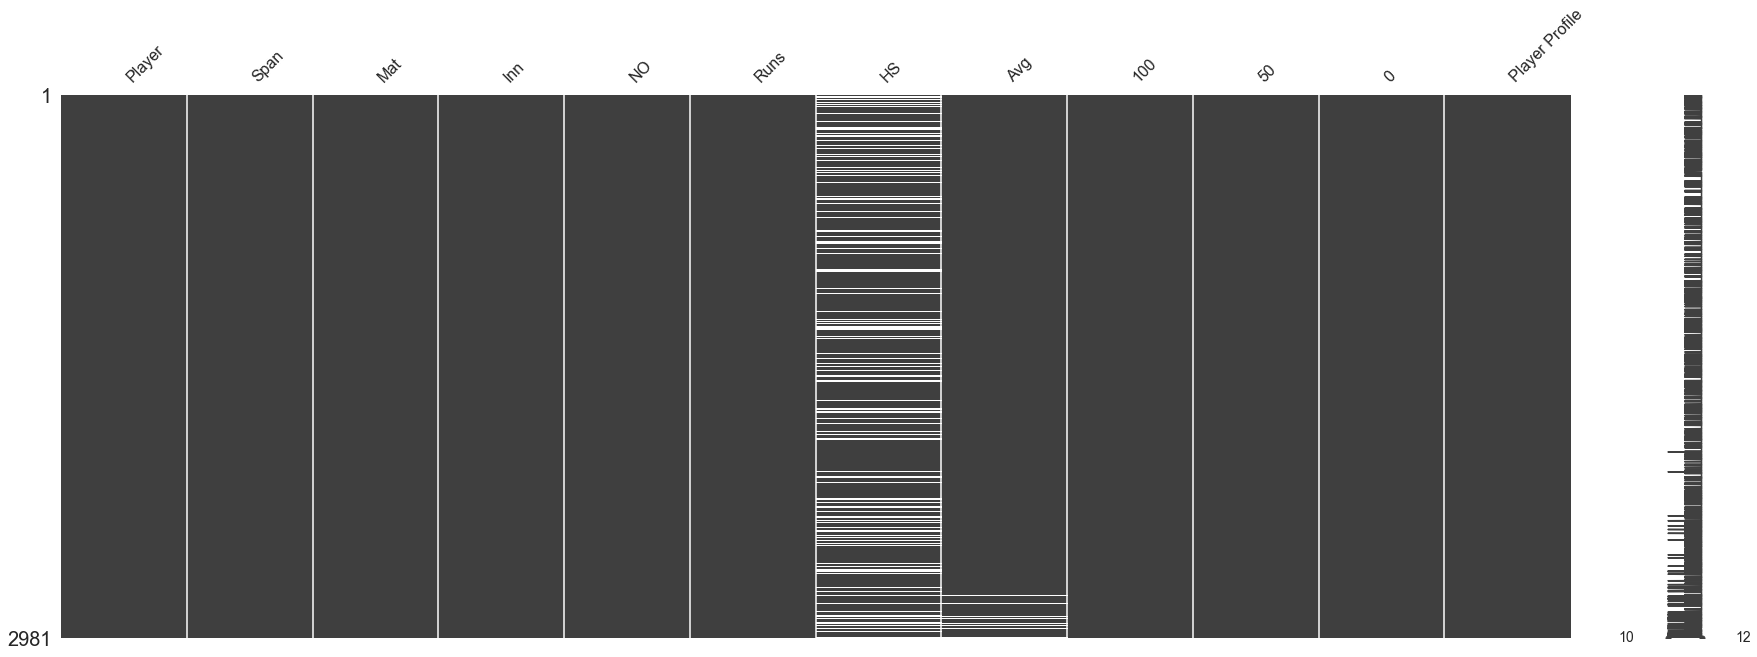

In [19]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

In [20]:
# check for missing values

df.isnull().sum()

Player              0
Span                0
Mat                 0
Inn                 0
NO                  0
Runs                0
HS                657
Avg                68
100                 0
50                  0
0                   0
Player Profile      0
dtype: int64

In [21]:
# statistical properties of dataset
df.describe()

,Mat,Inn,NO,Runs,HS,Avg,100,50,0
count,2981.000000,2981.000000,2981.000000,2981.000000,2324.000000,2913.000000,2981.000000,2981.000000,2981.000000
mean,17.536397,28.282791,3.662194,745.010399,70.376076,20.539228,1.407917,3.414291,3.048977
std,25.002452,40.718944,6.244537,1557.183189,64.987165,14.548934,4.261501,7.663067,4.251997
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,0.000000,38.000000,21.000000,9.500000,0.000000,0.000000,0.000000
50%,7.000000,11.000000,1.000000,158.000000,49.000000,18.000000,0.000000,0.000000,1.000000
75%,21.000000,34.000000,4.000000,673.000000,103.250000,29.150000,1.000000,3.000000,4.000000
max,200.000000,329.000000,89.000000,15921.000000,380.000000,160.500000,51.000000,68.000000,43.000000


In [22]:
# statistical properties of dataset
df.describe(include='object')

,Player,Span,Player Profile
count,2981,2981,2981
unique,2975,1139,2981
top,A Ward (ENG),2019-2019,http://stats.espncricinfo.com/ci/content/playe...
freq,2,44,1


In [23]:
df['HS'] = hs

In [24]:
df.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...


In [25]:
df = df.convert_objects(convert_numeric=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 12 columns):
Player            2981 non-null object
Span              2981 non-null object
Mat               2981 non-null int64
Inn               2981 non-null int64
NO                2981 non-null int64
Runs              2981 non-null int64
HS                2981 non-null int64
Avg               2913 non-null float64
100               2981 non-null int64
50                2981 non-null int64
0                 2981 non-null int64
Player Profile    2981 non-null object
dtypes: float64(1), int64(8), object(3)
memory usage: 279.5+ KB


In [27]:
null_data = df[df.isnull().any(axis=1)]

In [28]:
null_data_HS = df['HS'].notnull()

In [29]:
filtered_HS = df[null_data_HS]

In [30]:
filtered_HS.shape

(2981, 12)

In [31]:
null_data_AVG = df['Avg'].notnull()

In [32]:
filtered_AVG = filtered_HS[null_data_AVG]

In [33]:
filtered_AVG.shape

(2913, 12)

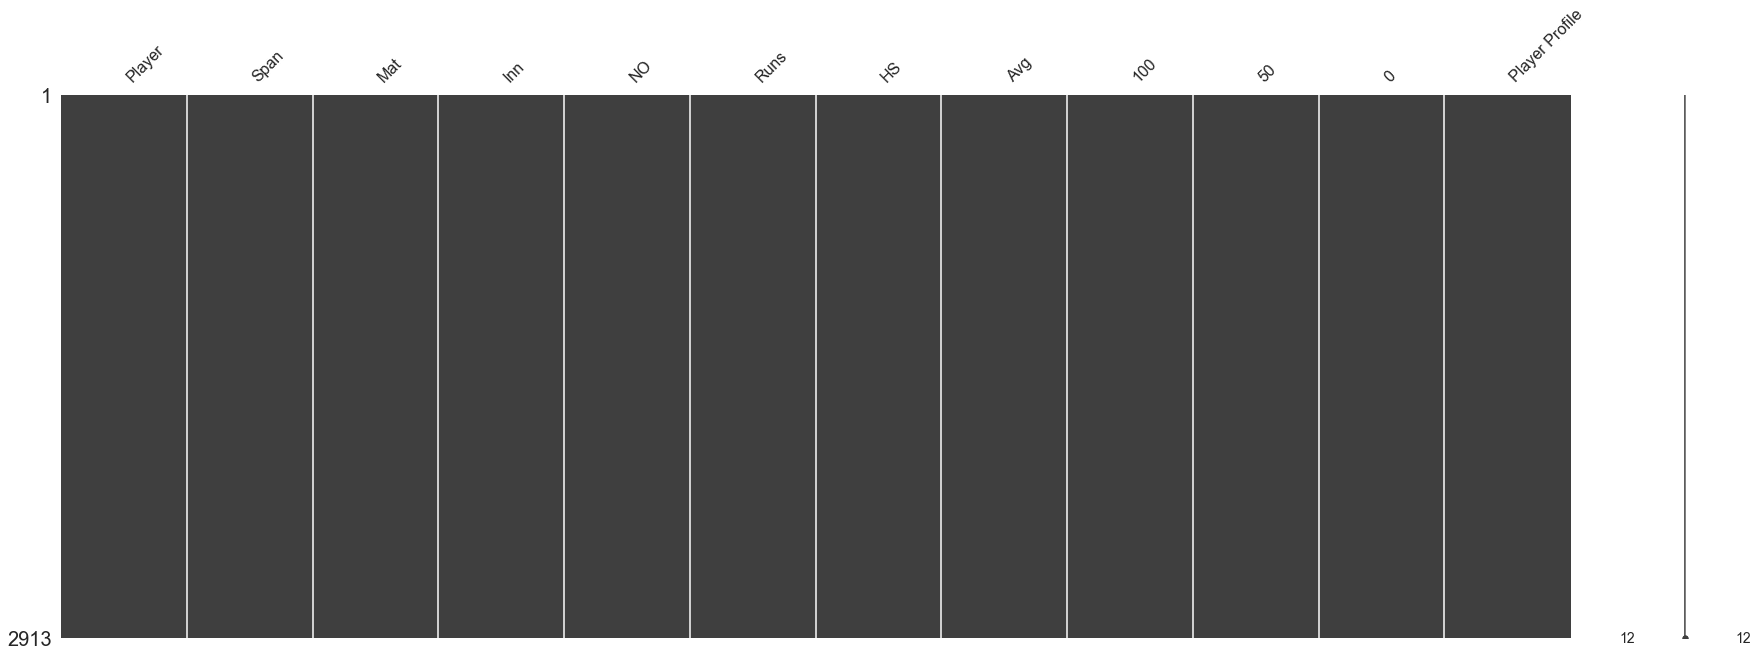

In [34]:
# Plot graphic of missing values
missingno.matrix(filtered_AVG, figsize = (30,10))

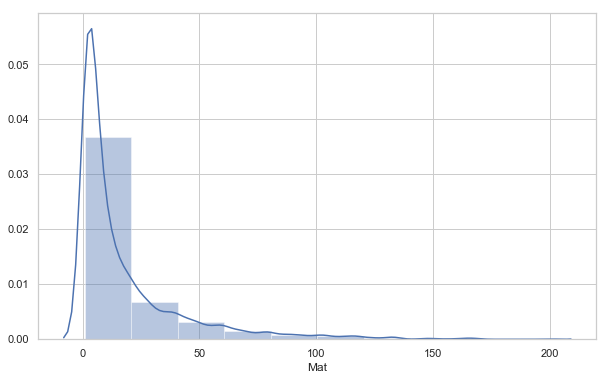

In [35]:
f, ax = plt.subplots(figsize=(10,6))
x = filtered_AVG['Mat']
ax = sns.distplot(x, bins=10)
plt.show()

## Top 5 Batsman Scores

In [36]:
top_5_runs = filtered_AVG.nlargest(5,"Runs")

In [37]:
print("Top 5 Batsman Run Scorers \n",top_5_runs)

Top 5 Batsman Run Scorers 
                  Player       Span  Mat  Inn  NO   Runs   HS    Avg  100  50  \
0  SR Tendulkar (INDIA)  1989-2013  200  329  33  15921  248  53.78   51  68   
1      RT Ponting (AUS)  1995-2012  168  287  29  13378  257  51.85   41  62   
2    JH Kallis (ICC/SA)  1995-2013  166  280  40  13289  224  55.37   45  58   
3  R Dravid (ICC/INDIA)  1996-2012  164  286  32  13288  270  52.31   36  63   
4         AN Cook (ENG)  2006-2018  161  291  16  12472  294  45.35   33  57   

    0                                     Player Profile  
0  14  http://stats.espncricinfo.com/ci/content/playe...  
1  17  http://stats.espncricinfo.com/ci/content/playe...  
2  16  http://stats.espncricinfo.com/ci/content/playe...  
3   8  http://stats.espncricinfo.com/ci/content/playe...  
4   9  http://stats.espncricinfo.com/ci/content/playe...  


In [38]:
runs = top_5_runs['Runs']
runs = list(runs)
player = top_5_runs['Player']
player = list(player)

## Bar Plot

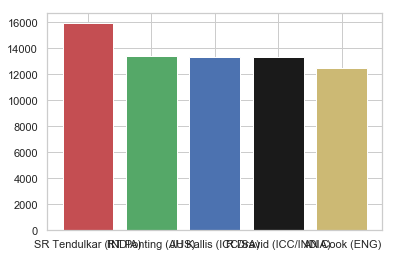

In [39]:
y_pos = np.arange(len(player))
my_colors = 'rgbkymc'

plt.bar(y_pos,runs,color=my_colors)
plt.xticks(y_pos,player)
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

## Top Five Not Outs Batsman

In [40]:
top_5_no = filtered_AVG.nlargest(5,"NO")

In [41]:
print("Top 5 Not Out Batsman \n",top_5_no)

Top 5 Not Out Batsman 
                        Player       Span  Mat  Inn  NO  Runs  HS    Avg  100  \
487         JM Anderson (ENG)  2003-2019  150  211  89  1181  81   9.68    0   
580             CA Walsh (WI)  1984-2001  132  185  61   936  30   7.54    0   
461   M Muralitharan (ICC/SL)  1992-2010  133  164  56  1261  67  11.67    0   
639          RGD Willis (ENG)  1971-1984   90  128  55   840  28  11.50    0   
1623           CS Martin (NZ)  2000-2013   71  104  52   123  12   2.36    0   

      50   0                                     Player Profile  
487    1  26  http://stats.espncricinfo.com/ci/content/playe...  
580    0  43  http://stats.espncricinfo.com/ci/content/playe...  
461    1  33  http://stats.espncricinfo.com/ci/content/playe...  
639    0  12  http://stats.espncricinfo.com/ci/content/playe...  
1623   0  36  http://stats.espncricinfo.com/ci/content/playe...  


In [42]:
not_out = top_5_no['NO']
not_out = list(not_out)
player = top_5_no['Player']
player = list(player)

## Bar Plot

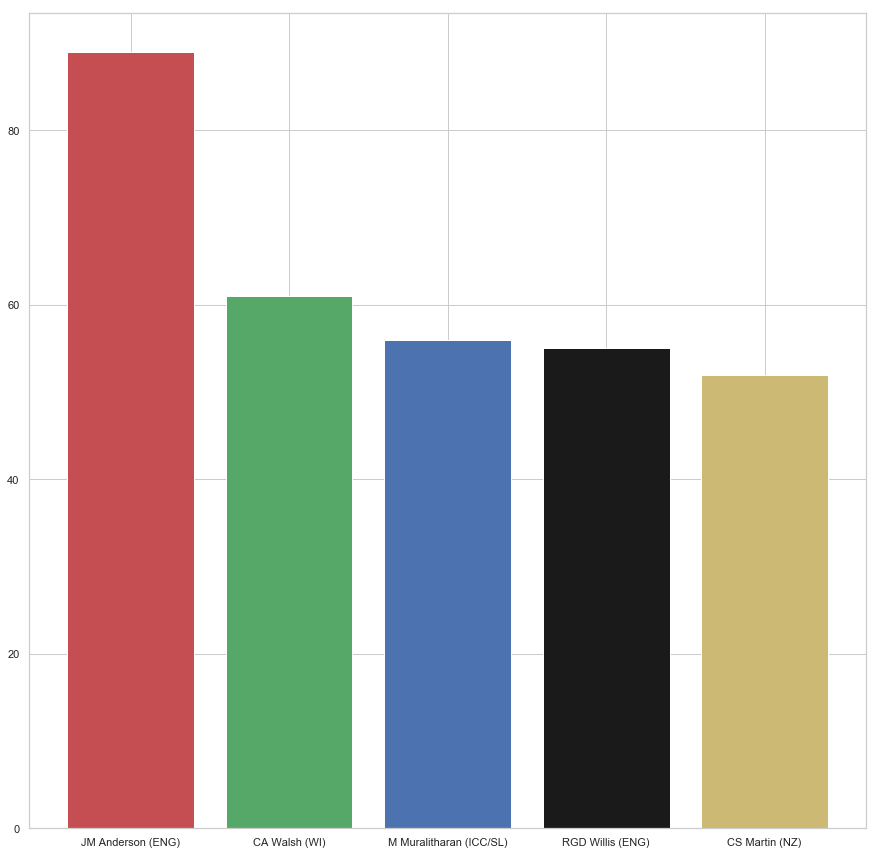

In [43]:
y_pos = np.arange(len(player))
my_colors = 'rgbkymc'

plt.bar(y_pos,not_out,color=my_colors)
plt.xticks(y_pos,player)
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

## Top Five Average Batsman Minimum 50 Matches

In [44]:
match_50 = filtered_AVG[filtered_AVG['Mat']>=50]
match_50.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...


In [45]:
top_5_avg = match_50.nlargest(5,"Avg")
print("Top 5 Average Batsman \n",top_5_avg)

Top 5 Average Batsman 
                   Player       Span  Mat  Inn  NO  Runs   HS    Avg  100  50  \
52      DG Bradman (AUS)  1928-1948   52   80  10  6996  334  99.94   29  13   
47       SPD Smith (AUS)  2010-2019   72  130  16  7164  239  62.84   26  28   
103    H Sutcliffe (ENG)  1924-1935   54   84   9  4555  194  60.73   16  23   
56   KF Barrington (ENG)  1955-1968   82  131  15  6806  256  58.67   20  35   
42      WR Hammond (ENG)  1927-1947   85  140  16  7249  336  58.45   22  24   

     0                                     Player Profile  
52   7  http://stats.espncricinfo.com/ci/content/playe...  
47   4  http://stats.espncricinfo.com/ci/content/playe...  
103  2  http://stats.espncricinfo.com/ci/content/playe...  
56   5  http://stats.espncricinfo.com/ci/content/playe...  
42   4  http://stats.espncricinfo.com/ci/content/playe...  


In [46]:
avg = top_5_avg['Avg']
avg = list(avg)
player = top_5_avg['Player']
player = list(player)

## Bar Plot

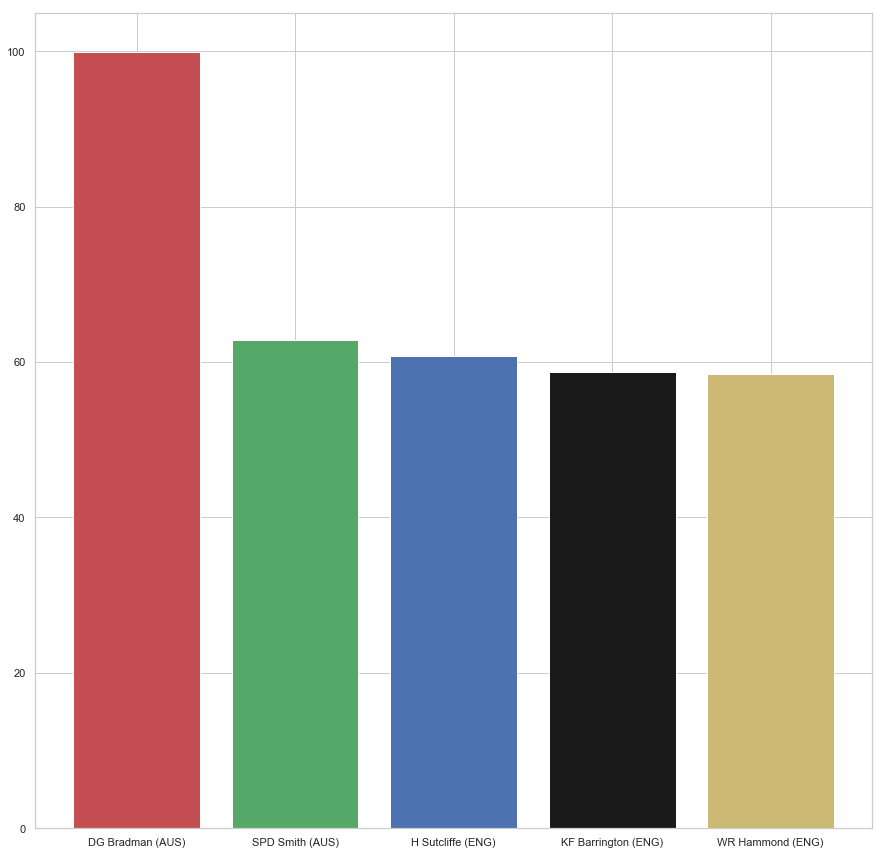

In [47]:
y_pos = np.arange(len(player))
my_colors = 'rgbkymc'

plt.bar(y_pos,avg,color=my_colors)
plt.xticks(y_pos,player)
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

## Top 5 Batsmens with High Scores

In [49]:
top_5_hs = filtered_AVG.nlargest(5,"HS")

In [50]:
print("Top 5 Batsmens with High Scores \n",top_5_hs)

Top 5 Batsmens with High Scores 
                    Player       Span  Mat  Inn  NO   Runs   HS    Avg  100  \
6        BC Lara (ICC/WI)  1990-2006  131  232   6  11953  400  52.88   34   
21        ML Hayden (AUS)  1994-2009  103  184  14   8625  380  50.73   30   
8   DPMD Jayawardene (SL)  1997-2014  149  252  15  11814  374  49.84   34   
28         GS Sobers (WI)  1954-1974   93  160  21   8032  365  57.78   26   
54         L Hutton (ENG)  1937-1955   79  138  15   6971  364  56.67   19   

    50   0                                     Player Profile  
6   48  17  http://stats.espncricinfo.com/ci/content/playe...  
21  29  14  http://stats.espncricinfo.com/ci/content/playe...  
8   50  15  http://stats.espncricinfo.com/ci/content/playe...  
28  30  12  http://stats.espncricinfo.com/ci/content/playe...  
54  33   5  http://stats.espncricinfo.com/ci/content/playe...  


In [53]:
h_s = top_5_hs['HS']
h_s = list(h_s)
player = top_5_hs['Player']
player = list(player)

## Barplot

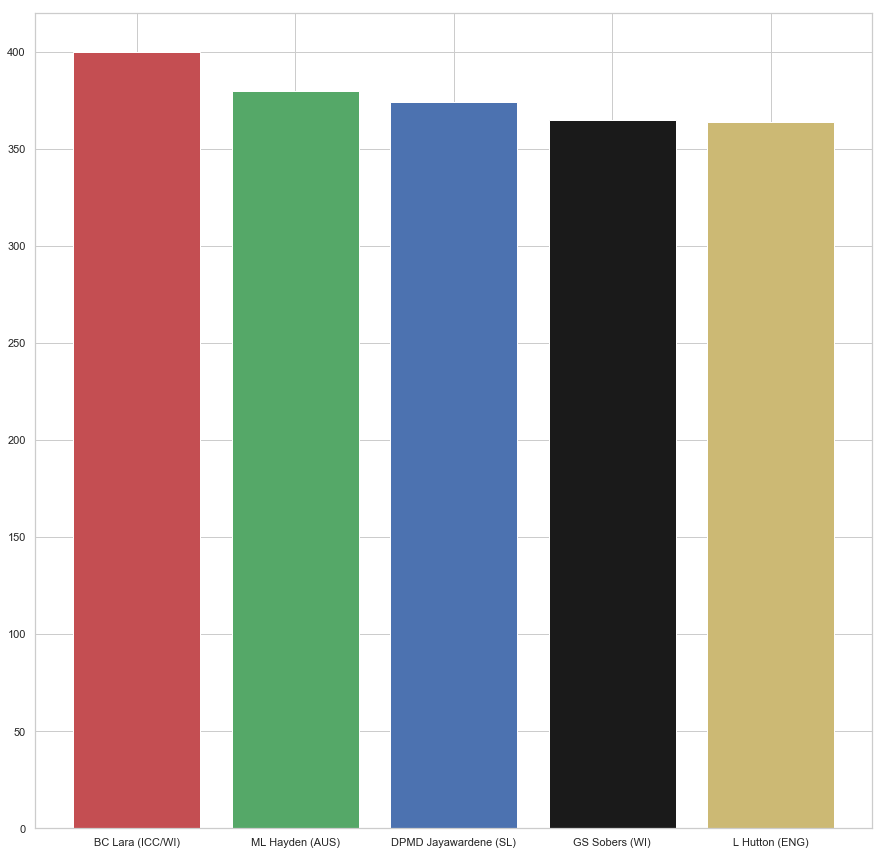

In [54]:
y_pos = np.arange(len(player))
my_colors = 'rgbkymc'

plt.bar(y_pos,h_s,color=my_colors)
plt.xticks(y_pos,player)
plt.rcParams["figure.figsize"] = (15,15)
plt.show()